<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 08-1 de Data Science

# Hierarchical Clustering
* Tempo estimado: **40** minutos

## Objetivos

Após completar essa aula você será capaz de :

* Criar cluster hierárquicos
* Usar as diferentes métricas
* Prever o cluster de um novo dado
* Analisar a qualidade do modelo


## Bibliotecas

In [1]:
import numpy as np 
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Obtendo Dados

In [2]:
estudante = ['Gabriela','Luiz Felipe','Patrícia','Ovídio','Leonor']
notas_matematica = np.array([3.7,7.8,8.9,7.0,3.4])
notas_fisica = np.array([2.7,8.0,1.0,1.0,2.0])
notas_quimica = np.array([9.1,1.5,2.7,9.0,5.0])
df_notas = pd.DataFrame({'matematica':notas_matematica,'fisica':notas_fisica,'quimica':notas_quimica},index=estudante)
df_notas.head()

,matematica,fisica,quimica
Gabriela,3.7,2.7,9.1
Luiz Felipe,7.8,8.0,1.5
Patrícia,8.9,1.0,2.7
Ovídio,7.0,1.0,9.0
Leonor,3.4,2.0,5.0


## Distância Euclidiana

### Single Linkage

* O método Single Linkage é também conhecido como método da menor distância. 
* Neste método, a distância entre dois grupos é medida como a menor distância entre dois pontos de cada grupo. 
* Este método é muito sensível a ruídos e pode levar à formação de clusters esticados (alongados).

In [3]:
model = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
model.fit(df_notas)


AgglomerativeClustering(linkage='single', metric='euclidean', n_clusters=3)

#### Quais alunos pertencem a quais clusters

In [4]:
model_labels = model.labels_
df_clusters = df_notas.copy(deep=True)
df_clusters['cluster'] = model_labels
df_clusters.head()

,matematica,fisica,quimica,cluster
Gabriela,3.7,2.7,9.1,0
Luiz Felipe,7.8,8.0,1.5,1
Patrícia,8.9,1.0,2.7,2
Ovídio,7.0,1.0,9.0,0
Leonor,3.4,2.0,5.0,0


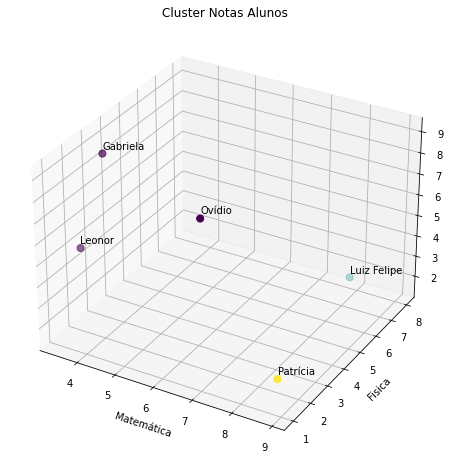

In [5]:
# Gerar gráfico 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_notas.iloc[:, 0], df_notas.iloc[:, 1], df_notas.iloc[:, 2], c=model_labels, s=50)
ax.set_title('Cluster Notas Alunos')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fisica')
ax.set_zlabel('Quimica')

# Adicionar o nome dos alunos como texto ao lado de cada ponto
for i in range(len(model_labels)):
    row = df_notas.iloc[i]
    ax.text(row['matematica'], row['fisica'], row['quimica']+0.2, row.name)

    

#### Análise de silhueta

* A silhueta é uma medida de validação interna para avaliar a qualidade de um modelo de clustering, que mede o quão bem cada amostra está classificada dentro do seu cluster em relação aos outros clusters. 
* É uma medida que varia entre -1 e 1, em que valores maiores indicam que a amostra está bem ajustada ao seu cluster e distante dos outros clusters.
* 1 indica que a amostra está bem ajustada ao seu cluster e distante dos outros clusters, o que é um bom sinal
* 0 indica que a amostra está próxima do limite entre dois clusters, o que pode ser um sinal de que o modelo não está bem definido ou de que a amostra pode pertencer a outro cluster.
* -1 indica que a amostra está mal classificada em seu cluster e muito próxima dos outros clusters, o que é um sinal de que o modelo está muito ruim ou de que a amostra foi mal classificada.

In [6]:
silhouette_scores = []

for n_clusters in range(2, 5):
    # Criando o modelo de clustering hierárquico
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='single', metric='euclidean')
    # Ajustando o modelo aos dados
    model.fit(df_notas)
    # Calculando o valor de silhueta para o modelo
    silhouette_avg = silhouette_score(df_notas, model.labels_,metric='euclidean')
    # Adicionando o valor de silhueta à lista
    silhouette_scores.append(silhouette_avg)

# Imprimindo os valores de silhueta para cada número de clusters testado
for i, score in enumerate(silhouette_scores):
    print(f"Silhouette score para {i+2} clusters: {score:.2f}")

Silhouette score para 2 clusters: 0.27
Silhouette score para 3 clusters: 0.21
Silhouette score para 4 clusters: 0.09


#### Gráfico Dendograma

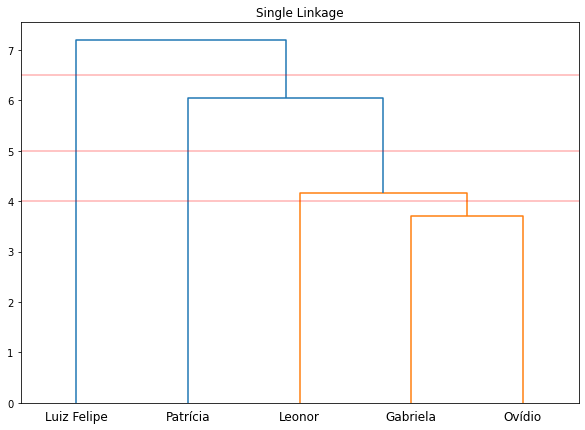

In [7]:
plt.figure(figsize=(10, 7))
plt.title("Single Linkage")
linkage_matrix = linkage(df_notas, method='single',metric='euclidean') 
dendrogram(linkage_matrix,labels=df_notas.index)
plt.axhline(4, color='red',alpha=0.3)
plt.axhline(5, color='red',alpha=0.3)
plt.axhline(6.5, color='red',alpha=0.3)
plt.show()


#### Prevendo cluster do Henrique

In [8]:
df_notas_henrique = pd.DataFrame({'matematica':[8.0],'fisica':[2.0],'quimica':[3]},index=['Henrique'])
df_notas_henrique.head()

,matematica,fisica,quimica
Henrique,8.0,2.0,3


In [9]:
df_notas = pd.concat([df_notas,df_notas_henrique] , axis='rows')
df_notas.head(10)

,matematica,fisica,quimica
Gabriela,3.7,2.7,9.1
Luiz Felipe,7.8,8.0,1.5
Patrícia,8.9,1.0,2.7
Ovídio,7.0,1.0,9.0
Leonor,3.4,2.0,5.0
Henrique,8.0,2.0,3.0


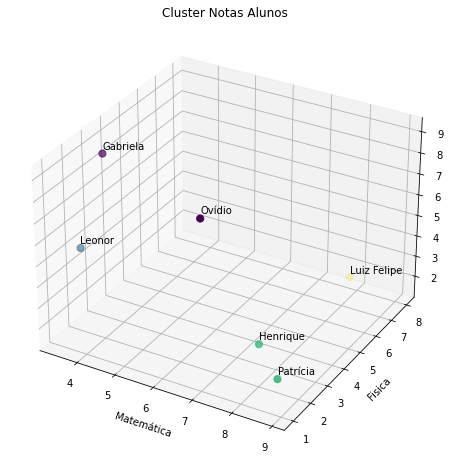

In [10]:
df_clusters = df_notas.copy(deep=True)
df_clusters['cluster'] = model.fit_predict(df_notas)

# Gerar gráfico 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clusters.iloc[:, 0], df_clusters.iloc[:, 1], df_clusters.iloc[:, 2], c=df_clusters['cluster'], s=50)
ax.set_title('Cluster Notas Alunos')
ax.set_xlabel('Matemática')
ax.set_ylabel('Fisica')
ax.set_zlabel('Quimica')

# Adicionar o nome dos alunos como texto ao lado de cada ponto
for i in range(len(df_clusters.iloc[:,0])):
    row = df_clusters.iloc[i]
    ax.text(row['matematica'], row['fisica'], row['quimica']+0.2, row.name)


### Complete Linkage

* O método Complete Linkage é também conhecido como método da maior distância.
* Neste método, a distância entre dois grupos é medida como a maior distância entre dois pontos de cada grupo.
* Este método é menos sensível a ruídos do que o método Single Linkage, mas pode levar à formação de clusters esféricos.

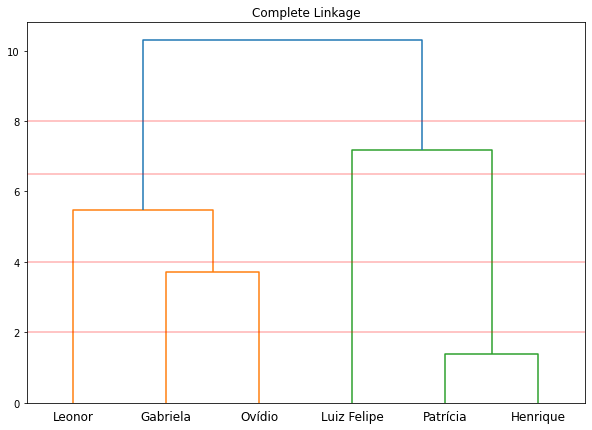

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Complete Linkage")
linkage_matrix = linkage(df_notas, method='complete',metric='euclidean') 
dendrogram(linkage_matrix,labels=df_notas.index)
plt.axhline(2, color='red',alpha=0.3)
plt.axhline(4, color='red',alpha=0.3)
plt.axhline(6.5, color='red',alpha=0.3)
plt.axhline(8, color='red',alpha=0.3)
plt.show()

### Average Linkage:

 * O método Average Linkage é também conhecido como método da média.
 * Neste método, a distância entre dois grupos é medida como a média das distâncias entre todos os pontos dos dois grupos.
 * Este método é menos sensível a ruídos do que os métodos Single Linkage e Complete Linkage, e pode levar à formação de clusters com formas complexas.

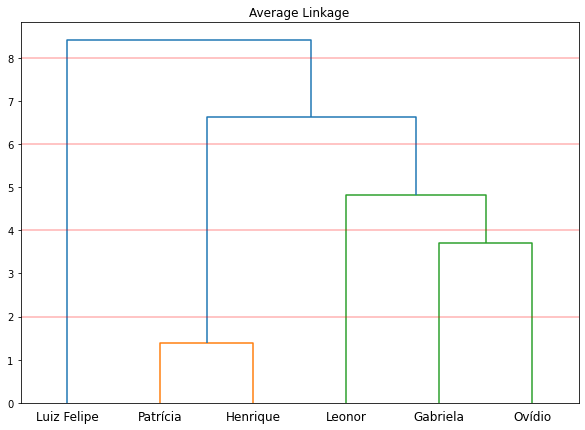

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Average Linkage")
linkage_matrix = linkage(df_notas, method='average',metric='euclidean') 
dendrogram(linkage_matrix,labels=df_notas.index)
plt.axhline(2, color='red',alpha=0.3)
plt.axhline(4, color='red',alpha=0.3)
plt.axhline(6, color='red',alpha=0.3)
plt.axhline(8, color='red',alpha=0.3)
plt.show()

### Ward's Linkage

* O método Ward's Linkage é também conhecido como método da variância mínima.
* Neste método, a distância entre dois grupos é medida como a soma das diferenças entre cada ponto e a média do grupo, elevada ao quadrado.
* Este método é menos sensível a ruídos do que os métodos Single Linkage, Complete Linkage e Average Linkage, e tende a formar clusters compactos e com variação mínima.

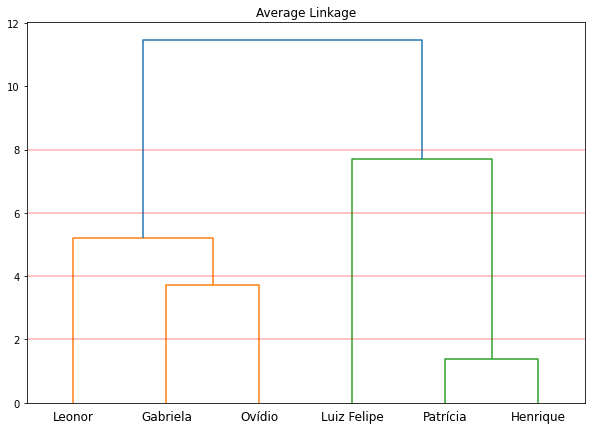

In [13]:
plt.figure(figsize=(10, 7))
plt.title("Ward's Linkage")
linkage_matrix = linkage(df_notas, method='ward',metric='euclidean') 
dendrogram(linkage_matrix,labels=df_notas.index)
plt.axhline(2, color='red',alpha=0.3)
plt.axhline(4, color='red',alpha=0.3)
plt.axhline(6, color='red',alpha=0.3)
plt.axhline(8, color='red',alpha=0.3)
plt.show()

## Referências

[1] Fávero, Belfiore (2017) Manual de análise de dados

[2] https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html